<a href="https://colab.research.google.com/github/PabloAMendez/PabloAMendez/blob/main/vectores_particula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

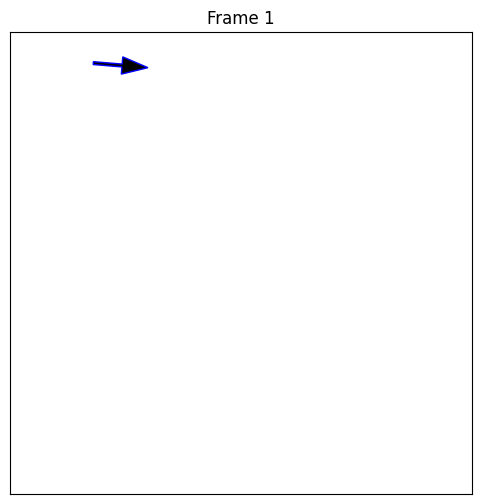

In [1]:
"""
==================
Animación template
==================
Animación del movimiento de un objeto impulsado por fuerza constante.
Profesor: A. Pimentel
Alumno: Pablo A. Méndez
Fecha: Noviembre 2024
"""

import numpy as np
import math
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display

"""
Definición de la clase Particula que representa la posición y dirección de cada partícula.
"""
class Particula:
    def __init__(self, sigma, L):
        self.x = random.uniform(0, L)          # Coordenada X, valor inicializado aleatoriamente entre 0 y L
        self.y = random.uniform(0, L)          # Coordenada Y, valor inicializado aleatoriamente entre 0 y L
        self.angle = random.uniform(0, 360)    # Ángulo en grados

"""
Parámetros GLOBALES del sistema
"""
n_vec = 1        # Número de partículas en el sistema
L = 8            # Distancia característica del sistema (Lado de la caja)
sigma = 0.5      # Magnitud de la fuerza aplicada

# Se genera el "lienzo" o espacio para dibujar las partículas.
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, L)
ax.set_ylim(0, L)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')

"""
Generación de una lista que contiene las partículas que se desplazarán en el espacio.
Cada partícula es un objeto de la clase Particula.
"""
particulas_lista = []
for i in range(n_vec):
    particulas_lista.append(Particula(sigma, L))

"""
Función de actualización para la animación.
El parámetro "frame_number" se calcula a partir de los parámetros en FuncAnimation.
"""
def update(frame_number):
    ax.cla()  # Limpiar el eje para el siguiente frame
    ax.set_xlim(0, L)
    ax.set_ylim(0, L)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    # Actualizar y dibujar cada partícula
    for p in particulas_lista:
        # Actualizar el ángulo y las coordenadas
        p.angle = random.uniform(0, 360)   # Ángulo en grados
        p.x += sigma * math.cos(math.radians(p.angle))  # Actualizar posición X
        p.y += sigma * math.sin(math.radians(p.angle))  # Actualizar posición Y

        # Asegurar que las partículas se mantengan dentro de los límites
        p.x = p.x % L
        p.y = p.y % L

        # Dibujar la flecha que representa la dirección de la partícula
        dx = sigma * math.cos(math.radians(p.angle))
        dy = sigma * math.sin(math.radians(p.angle))
        ax.arrow(p.x, p.y, dx, dy, head_width=0.3, width=0.05, fc="black", ec='blue')

    ax.set_title(f"Frame {frame_number+1}")

"""
Configuración y ejecución de la animación.
"""
n_frames = 200          # Número de frames
t_interval = 10      # Intervalo de tiempo entre frames en milisegundos
animation = FuncAnimation(fig, update, frames=n_frames, interval=t_interval, repeat=True)

# Mostrar la animación en Colab
display(HTML(animation.to_html5_video()))